# 0️⃣ Ejercicios típicos en Python

Estos son ejercicios que podrían preguntar en entrevistas y que conviene que sepa resolver.

🔴 Parte 1 – Lógica

Tienes esta lista:
nums = [4, 1, 7, 3, 9, 2, 8, 3, 1]

Devuelve el primer número que se repite.

1. No vale usar collections.Counter.
2. Debe ser O(n).
3. Explica por qué es O(n).

✅ Solución usando set()

In [17]:
nums = [4, 1, 7, 3, 9, 2, 8, 3, 1]
vistos = set()  # Una estructura basada en hash para almacenar elementos únicos

print(vistos)  # Muestra el set vacío

for i in nums:  # Recorre cada elemento
    if i in vistos:  # Si ya hemos visto el número
        print(i)  # Imprime el primer duplicado
        break  # Termina el bucle
    vistos.add(i)  # Añade el número al set

set()
3


Explicación:
- set() almacena elementos únicos y permite búsquedas rápidas O(1) gracias a la tabla hash.

- Cada elemento se recorre una sola vez → tiempo total O(n).

- No todos los objetos pueden ir en un set:
    - Hashables: int, float, string, tuple ✔
    - No hashables: list, dict ❌

🔹 Solución sin set()

In [18]:
nums = [4, 1, 7, 3, 9, 2, 8, 3, 1]
vistos = []

for i in nums:
    if i in vistos:  # Comprueba si ya está en la lista
        print(i)  # Primer duplicado encontrado
        break
    vistos.append(i)  # Añade el número a la lista



3


Funciona, pero más lento para listas grandes → $O(n^2)$, porque cada i in vistos recorre toda la lista vista hasta ahora.

## 1️⃣Regresión lineal con machine learning

X debe ser 2D para sklearn → (n_samples, n_features)

y = relación lineal + ruido

R²: 0.9928787475696582
Pendiente (coef_): 1.909995114327436
Intercepto (intercept_): 3.6421505501662157
Predicción para X=6: 15.102121236130833


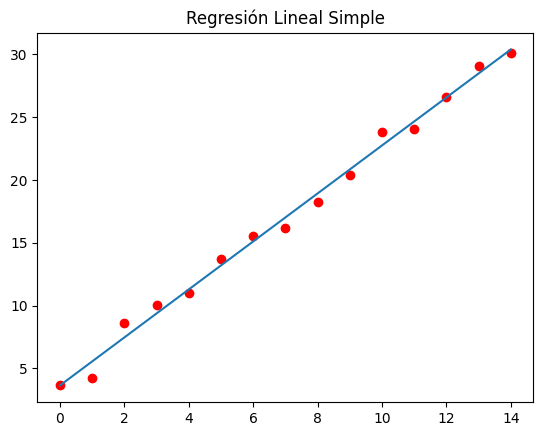

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Datos
X = np.arange(15).reshape(-1, 1)
y = 2 * X.flatten() + 3 + np.random.randn(15)

# 2. Modelo
model = LinearRegression()
model.fit(X, y)
print("R²:", model.score(X, y))


# 3. Coeficientes
print(f"Pendiente (coef_): {model.coef_[0]}")
print(f"Intercepto (intercept_): {model.intercept_}")

# 4. Predicción
X_new = np.array([[6]])
y_pred = model.predict(X_new)
print(f"Predicción para X=6: {y_pred[0]}")

# 5. Visualización
plt.scatter(X, y, color="red")
plt.plot(X, model.predict(X))
plt.title('Regresión Lineal Simple')
plt.show()

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("hanaksoy/customer-purchasing-behaviors")

print("Path to dataset files:", path)




Path to dataset files: C:\Users\pablo\.cache\kagglehub\datasets\hanaksoy\customer-purchasing-behaviors\versions\1


Muevo el fichero csv a mi carpet apara abrirlo

In [13]:
import os
path = r'C:\Users\pablo\OneDrive\Documentos\Programas'
dataset = pd.read_csv(
    r'C:\Users\pablo\OneDrive\Documentos\Programas\Customer Purchasing Behaviors.csv')


In [ ]:
#Vamos a explorar el dataset
import pandas as pd

df = dataset  # tu dataframe

# ver columnas
print(df.columns)

# tamaño
print(df.shape)

# primeras filas
df.head()

df.describe()





Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'region', 'purchase_frequency'],
      dtype='object')
(238, 7)


,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


## Vamos a covertir en un problema binario

Definir si comprar mucho (1) o poco (0). Haremos entonces que si las compras del cliente están por encima de la media será un cliente que compra mucho y en caso contrario que compra poco.

> Regla:
> - Si compra más que la media → 1
> - Si no → 0

In [17]:
df.describe()


,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


Queremos ver si el dataset está:

- equilibrado → buen caso para empezar

- desbalanceado → el modelo puede engañarnos (muy típico en entrevistas)

In [26]:
threshold = df['purchase_frequency'].mean()
df['purchased'] = (df['purchase_frequency'] > threshold).astype(int)
df['purchased'].value_counts()



purchased
1    137
0    101
Name: count, dtype: int64

El dataset no presenta un desbalanceo severo, por lo que podemos entrenar sin técnicas de resampling inicialmente.

Siguiente paso lógico (muy importante mentalmente)

Antes de entrenar cualquier modelo:

👉 separar variables predictoras de la variable objetivo

Nunca entrenas con todo junto.

Ahora piensa:
¿todas las columnas sirven para predecir compras?

In [ ]:
X = df.drop(columns=['purchased'])
y = df['purchased']
X = df.drop(columns=['purchased', 'purchase_frequency', 'user_id'])


Quedan:

>   Numéricas:
1.  age
2.  annual_income
3.  purchase_amount
4.  loyalty_score

>   Categórica:
1.  region

### ¿Qué necesita un modelo antes de entrenar?

-   Datos numéricos en escala comparable
-   Variables categóricas convertidas a números
-   Separación train / test

Entonces:
1.  Separar en train y test
    11.    ¿Por qué primero? -> Porque si escalas antes, el modelo “ve” información del test → fuga de datos.
2. Convertir la variable categórica -> region es texto. Los modelos no entienden texto.
3. Escalar variables numéricas
4. Entrenar modelo
5. Hacer predicciones
6. Evaluar el modelo

In [30]:
from sklearn.model_selection import train_test_split #1️⃣

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = pd.get_dummies(X_train, columns=['region'], drop_first=True) #2️⃣
X_test = pd.get_dummies(X_test, columns=['region'], drop_first=True)

from sklearn.preprocessing import StandardScaler #3️⃣

scaler = StandardScaler()

numeric_cols = ['age', 'annual_income', 'purchase_amount', 'loyalty_score']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

from sklearn.linear_model import LogisticRegression #4️⃣

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test) #5️⃣

y_prob = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score #6️⃣

accuracy_score(y_test, y_pred)


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))






              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.96      1.00      0.98        27

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48

